In [1]:
import numpy as np # Import the numpy library and assign it the alias 'np'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp '/content/drive/MyDrive/Emotion detection project/Imocap/IMOCAP/Copy of IEMOCAP_full_release_withoutVideos.tar.gz' /content/


In [4]:
!tar -xzvf '/content/Copy of IEMOCAP_full_release_withoutVideos.tar.gz' -C /content/


Streaming output truncated to the last 5000 lines.
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M030.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M021.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F007.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F003.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M033.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F013.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_F022.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M012.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses05F_script03_1/Ses05F_script03_1_M016.txt
IEMOCAP_full_release/Session5/sentences/MOCAP_rotated/Ses0

In [5]:
!ls /content/

'Copy of IEMOCAP_full_release_withoutVideos.tar.gz'   drive   IEMOCAP_full_release   sample_data


In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
filtered_data = pd.read_csv('/content/drive/MyDrive/Emotion detection project/Imocap/filtered_data.csv')


In [7]:
print(filtered_data["emotion"].value_counts())
filtered_data.count()

emotion
fru    1849
neu    1849
ang    1849
sad    1849
exc    1849
hap    1849
sur    1849
fea    1849
dis    1849
Name: count, dtype: int64


,0
path,16641
emotion,16641


In [8]:
X = np.load('/content/drive/MyDrive/Emotion detection project/Imocap/all_four_mfcc_imocap.npy')

In [9]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

def ana_emotion(emotion:str, df:pd.DataFrame):
    path=np.array(df['speech'][df['label']==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    display(Audio(path))

In [10]:
from sklearn.preprocessing import OneHotEncoder # Import the OneHotEncoder class

ohe=OneHotEncoder()
y = ohe.fit_transform( filtered_data[['emotion']] )
y = y.toarray()

In [11]:
from sklearn.model_selection import train_test_split



# Create train, validation and test set
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)
x_tr, x_va, y_tr, y_va = train_test_split(x_tr, y_tr, test_size=0.3, shuffle=True, random_state=0)

# Convert data to numpy arrays
x_tr = np.array([i for i in x_tr])
x_va = np.array([i for i in x_va])
x_te = np.array([i for i in x_te])

# Plot size of data
print(x_tr.shape)
print(x_va.shape)
print(x_te.shape)

(10483, 40, 1)
(4493, 40, 1)
(1665, 40, 1)


In [12]:
X.shape, y.shape

((16641, 40, 1), (16641, 9))

In [13]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,929 (1.17 MB)

 Trainable params: 305,929 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Train the model
history=model.fit(x_tr,y_tr,validation_data=(x_va, y_va),epochs=80,batch_size=32)

Epoch 1/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 48s 137ms/step - accuracy: 0.2454 - loss: 2.0231 - val_accuracy: 0.3238 - val_loss: 1.7386
Epoch 2/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 71s 105ms/step - accuracy: 0.3310 - loss: 1.7358 - val_accuracy: 0.3777 - val_loss: 1.6081
Epoch 3/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 43s 112ms/step - accuracy: 0.3663 - loss: 1.6327 - val_accuracy: 0.3942 - val_loss: 1.5589
Epoch 4/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 35s 107ms/step - accuracy: 0.4135 - loss: 1.5230 - val_accuracy: 0.4607 - val_loss: 1.3809
Epoch 5/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.4692 - loss: 1.3841 - val_accuracy: 0.4983 - val_loss: 1.3053
Epoch 6/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.4948 - loss: 1.3087 - val_accuracy: 0.5023 - val_loss: 1.2797
Epoch 7/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.5254 - loss: 1.2227 - val_accuracy: 0.5404 - val_loss: 1.1540
Epoch 8/80
328/328 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.5519 - loss: 1

In [15]:
model.save('lstm_80Epoch_Imocap.h5')

In [16]:
from google.colab import files

files.download('lstm_80Epoch_Imocap.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

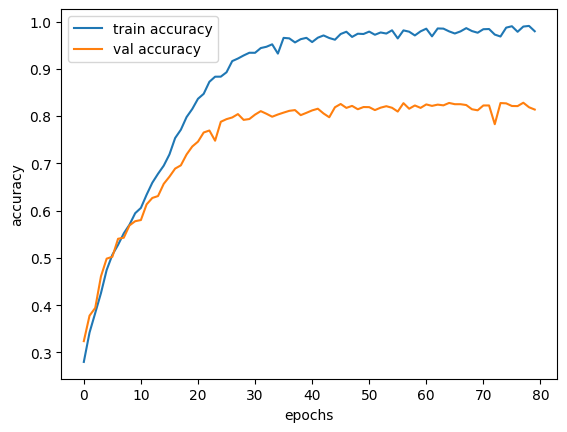

In [17]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it the alias 'plt'

epochs = list(range(80))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [18]:
# Collect loss and accuracy for the test set
loss_te, accuracy_te = model.evaluate(x_te, y_te)

print("Test loss: {:.2f}".format(loss_te))
print("Test accuracy: {:.2f}%".format(100 * accuracy_te))

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8007 - loss: 1.4147
Test loss: 1.30
Test accuracy: 81.98%
